<a href="https://colab.research.google.com/github/juliotorresma/Materia_MachineLearning/blob/main/Projecto_ML_Parcial1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **RED NEURONAL**

In [25]:
#Para futuros pasos guardamos la direccion de acceso a cada carpeta
TRAIN_PATH = "/content/gdrive/MyDrive/billetes/train"
VAL_PATH = "/content/gdrive/MyDrive/billetes/test"

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import tensorflow as tf 


model = tf.keras.models.Sequential()

#Primera Capa
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[224,224,3]))
model.add(tf.keras.layers.MaxPool2D(2,2))


model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))
#model.add(Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))
#model.add(Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation="relu"))
#model.add(Dropout(0.25))

model.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax)) 

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

train_datagen = image.ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/billetes/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode='categorical')
train_generator.class_indices

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs = 20
)



Found 284 images belonging to 5 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
5/5 [==============================] - 3s 468ms/step - loss: 1.7732 - accuracy: 0.2518
Epoch 2/20
5/5 [==============================] - 2s 473ms/step - loss: 0.5160 - accuracy: 0.2469
Epoch 3/20
5/5 [==============================] - 2s 466ms/step - loss: 0.4704 - accuracy: 0.3387
Epoch 4/20
5/5 [==============================] - 3s 485ms/step - loss: 0.4221 - accuracy: 0.5839
Epoch 5/20
5/5 [==============================] - 2s 498ms/step - loss: 0.3338 - accuracy: 0.5073
Epoch 6/20
5/5 [==============================] - 2s 468ms/step - loss: 0.2740 - accuracy: 0.7765
Epoch 7/20
5/5 [==============================] - 2s 481ms/step - loss: 0.1362 - accuracy: 0.9554
Epoch 8/20
5/5 [==============================] - 2s 485ms/step - loss: 0.0945 - accuracy: 0.9149
Epoch 9/20
5/5 [==============================] - 2s 486ms/step - loss: 0.0728 - accuracy: 0.9579
Epoch 10/20
5/5 [==============================] - 2s 483ms/step - loss: 0.0341 - accuracy: 1.0000
Epoch 11/20
5/5 [==

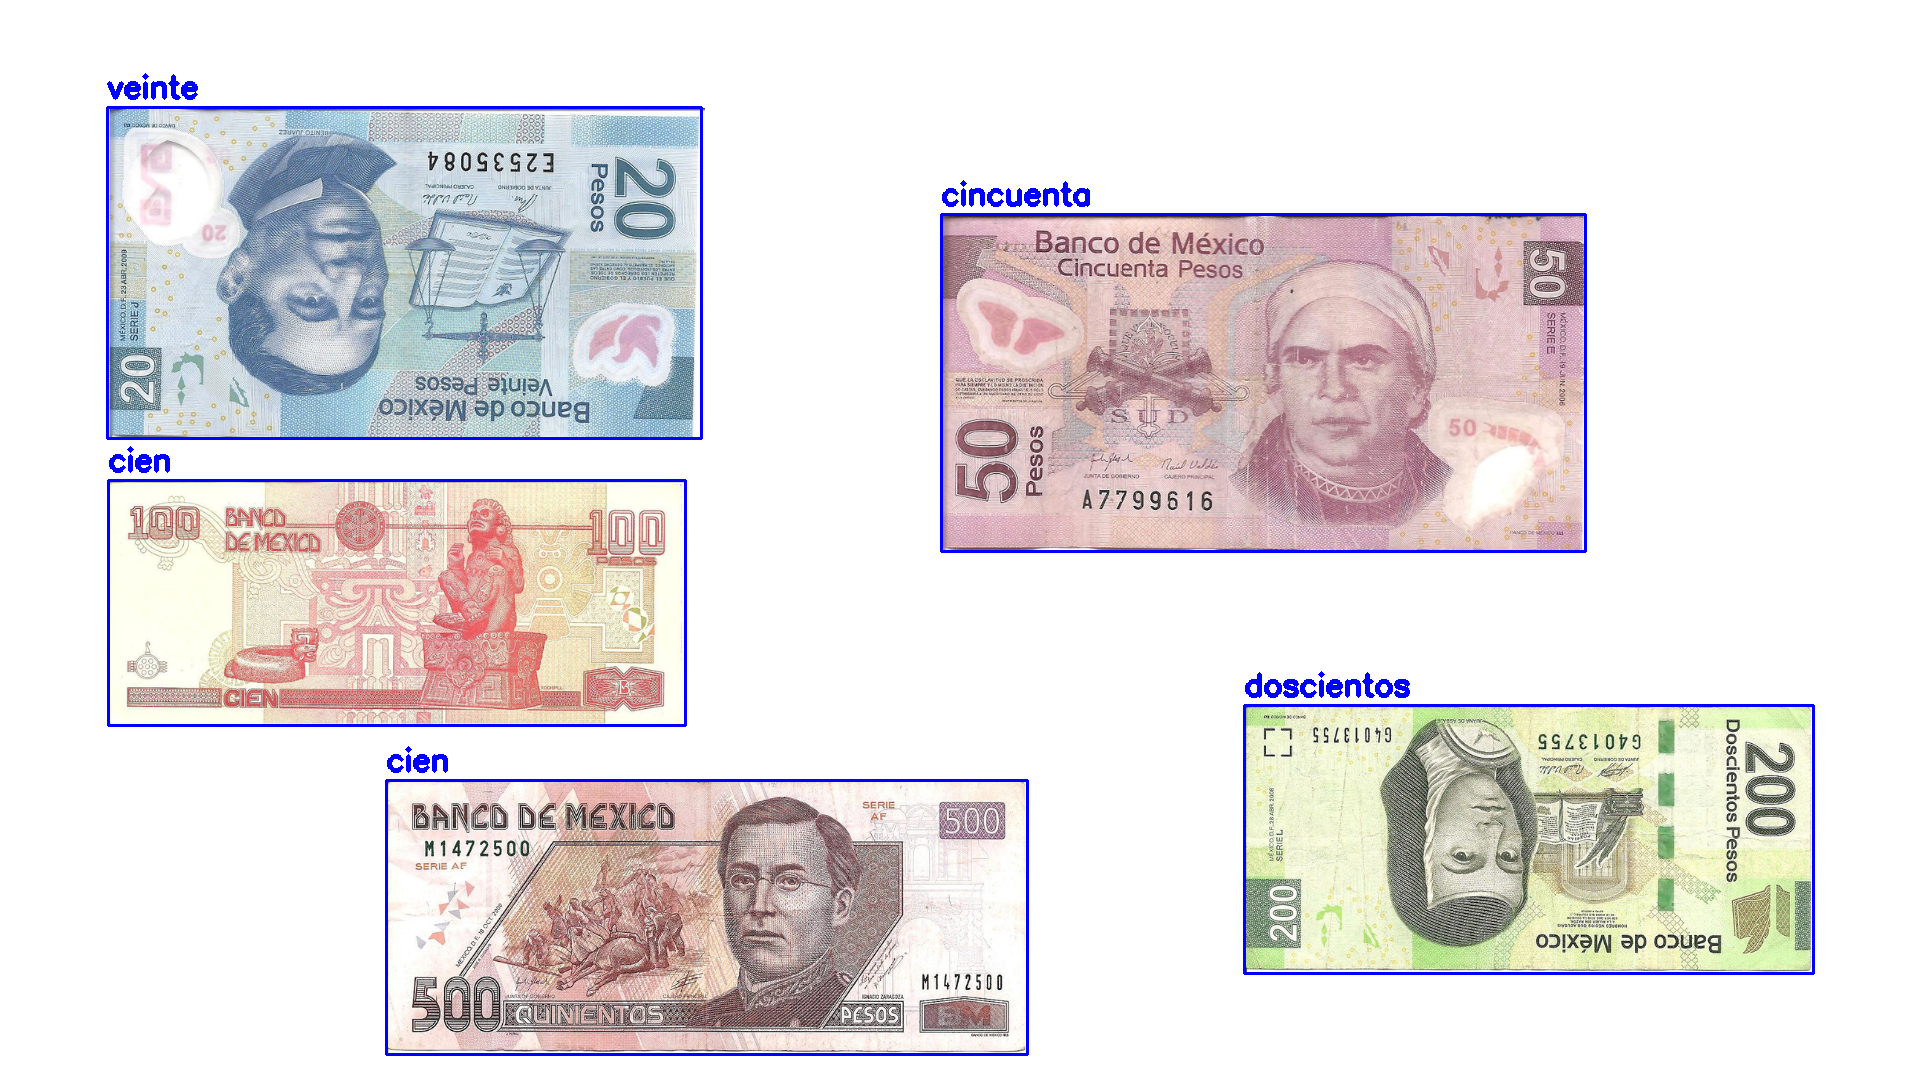

In [28]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

billetesLower = (5,10,50)
billetesUpper = (255,255,255)

img = cv2.imread("/content/gdrive/MyDrive/billetes/pruebaVivo.png", 1)

nada = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(nada, cv2.COLOR_RGB2HSV)

hsv = cv2.inRange(hsv, billetesLower, billetesUpper)

blur = cv2.GaussianBlur(hsv, (5,5),    0)

_, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)

dilated = cv2.dilate(thresh, None, iterations=3)  

contornos, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#print(contornos)

for billete in contornos:
    if cv2.contourArea(billete)>11000:
        (x,y,w,h) = cv2.boundingRect(billete)
        roi_color = nada[y:y+h, x:x+w]
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
    
        billete_individual = cv2.resize(roi_color,(224,224))



        #billete_individual = tf.keras.utils.normalize(billete_individual) 

        vector_billete = image.img_to_array(billete_individual)
        vector_billete = np.expand_dims(vector_billete ,axis=0)

        imagenPrediccion = np.vstack([vector_billete])
        #Se solicita la predicción final
        
        val = model.predict(imagenPrediccion)


      

        class_name = ['cien', 'doscientos', 'veinte', 'quinientos', 'cincuenta']
          
        cv2.putText(img, class_name[np.argmax(val)] , (x,y-10), cv2.FONT_HERSHEY_SIMPLEX,  
                      1, (255, 0, 0), 3) 


cv2_imshow(img)
